<center><h1> Data Mining Final Project  </center></h1>

#### House Sales price ....... 
##### By : Bar Leshem, Yuval Anavim, Shachar Macharez
- Email:    Barlesh8@gmal.com


In [1]:
from helper_functions import *
import random

<a id="top"></a>

### Table of contents: 

- [Introduction: ](#Intro)
- [1. Data : cleaning &  filling blank features: ](#1.)
    - [1.1. N/A](#1.1.)
    - [1.2. Missing cells](#1.2.)
- [2. Linear Regression ](#1.)
    - [1.1. PCA ](#1.1.)
    - [1.2. Linear Models](#1.2.)
- [2. Artificial Neural Network](#2.)
    - [2.1. sub1](#2.1.)
    - [2.2. sub2](#2.2.)    
- [Appendix](#Appendix)

<a id='Intro'></a>

## Introduction: 

- After pushing to github, notebooks can be viewed with http://nbviewer.jupyter.org/ . 
- You can see this notebook using nbviewer here: http://nbviewer.jupyter.org/github/kaplann/Blank_jupyter_project/blob/master/Blank_proj.ipynb#TODO:

[back to top](#top)

<a id='#TODO'></a>

## TODO: 

1. Add things to do
1. Do things todo  

[back to top](#top)

# Loading Data

In [2]:
data_path='/home/barlesh/Projects/Data_Mining_Project/data/'
train_file='train.csv'
test_file='test.csv'
#train_file_new='train_new.csv'
#test_file_new='test_new.csv'
result_path='results/'
result_file='res.csv'

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", data_path]).decode("utf8"))

# Any results you write to the current directory are saved as output.

results
test.csv
train.csv



In [4]:
houseprice=pd.read_csv(data_path+test_file)
houseprice.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# <a>  1.  Data : Cleaning & filling blank features: </a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
%matplotlib inline

In [6]:
train = pd.read_csv(data_path+train_file)
test = pd.read_csv(data_path+test_file)

In [7]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']), ignore_index=True)

# Imputation of missing values

In [8]:
# I have no idea how to do it better. Probably, it is better to do nothing
x = all_data.loc[np.logical_not(all_data["LotFrontage"].isnull()), "LotArea"]
y = all_data.loc[np.logical_not(all_data["LotFrontage"].isnull()), "LotFrontage"]
# plt.scatter(x, y)
t = (x <= 25000) & (y <= 150)
p = np.polyfit(x[t], y[t], 1)
all_data.loc[all_data['LotFrontage'].isnull(), 'LotFrontage'] = np.polyval(p, all_data.loc[all_data['LotFrontage'].isnull(), 'LotArea'])

In [9]:
all_data.loc[all_data.Alley.isnull(), 'Alley'] = 'NoAlley'
all_data.loc[all_data.MasVnrType.isnull(), 'MasVnrType'] = 'None' # no good
all_data.loc[all_data.MasVnrType == 'None', 'MasVnrArea'] = 0
all_data.loc[all_data.BsmtQual.isnull(), 'BsmtQual'] = 'NoBsmt'
all_data.loc[all_data.BsmtCond.isnull(), 'BsmtCond'] = 'NoBsmt'
all_data.loc[all_data.BsmtExposure.isnull(), 'BsmtExposure'] = 'NoBsmt'
all_data.loc[all_data.BsmtFinType1.isnull(), 'BsmtFinType1'] = 'NoBsmt'
all_data.loc[all_data.BsmtFinType2.isnull(), 'BsmtFinType2'] = 'NoBsmt'
all_data.loc[all_data.BsmtFinType1=='NoBsmt', 'BsmtFinSF1'] = 0
all_data.loc[all_data.BsmtFinType2=='NoBsmt', 'BsmtFinSF2'] = 0
all_data.loc[all_data.BsmtFinSF1.isnull(), 'BsmtFinSF1'] = all_data.BsmtFinSF1.median()
all_data.loc[all_data.BsmtQual=='NoBsmt', 'BsmtUnfSF'] = 0
all_data.loc[all_data.BsmtUnfSF.isnull(), 'BsmtUnfSF'] = all_data.BsmtUnfSF.median()
all_data.loc[all_data.BsmtQual=='NoBsmt', 'TotalBsmtSF'] = 0
all_data.loc[all_data.FireplaceQu.isnull(), 'FireplaceQu'] = 'NoFireplace'
all_data.loc[all_data.GarageType.isnull(), 'GarageType'] = 'NoGarage'
all_data.loc[all_data.GarageFinish.isnull(), 'GarageFinish'] = 'NoGarage'
all_data.loc[all_data.GarageQual.isnull(), 'GarageQual'] = 'NoGarage'
all_data.loc[all_data.GarageCond.isnull(), 'GarageCond'] = 'NoGarage'
all_data.loc[all_data.BsmtFullBath.isnull(), 'BsmtFullBath'] = 0
all_data.loc[all_data.BsmtHalfBath.isnull(), 'BsmtHalfBath'] = 0
all_data.loc[all_data.KitchenQual.isnull(), 'KitchenQual'] = 'TA'
all_data.loc[all_data.MSZoning.isnull(), 'MSZoning'] = 'RL'
all_data.loc[all_data.Utilities.isnull(), 'Utilities'] = 'AllPub'
all_data.loc[all_data.Exterior1st.isnull(), 'Exterior1st'] = 'VinylSd'
all_data.loc[all_data.Exterior2nd.isnull(), 'Exterior2nd'] = 'VinylSd'
all_data.loc[all_data.Functional.isnull(), 'Functional'] = 'Typ'
all_data.loc[all_data.SaleCondition.isnull(), 'SaleCondition'] = 'Normal'
all_data.loc[all_data.SaleCondition.isnull(), 'SaleType'] = 'WD'
all_data.loc[all_data['PoolQC'].isnull(), 'PoolQC'] = 'NoPool'
all_data.loc[all_data['Fence'].isnull(), 'Fence'] = 'NoFence'
all_data.loc[all_data['MiscFeature'].isnull(), 'MiscFeature'] = 'None'
all_data.loc[all_data['Electrical'].isnull(), 'Electrical'] = 'SBrkr'
# only one is null and it has type Detchd
all_data.loc[all_data['GarageArea'].isnull(), 'GarageArea'] = all_data.loc[all_data['GarageType']=='Detchd', 'GarageArea'].mean()
all_data.loc[all_data['GarageCars'].isnull(), 'GarageCars'] = all_data.loc[all_data['GarageType']=='Detchd', 'GarageCars'].median()

In [10]:
# where we have order we will use numeric
all_data = all_data.replace({'Utilities': {'AllPub': 1, 'NoSeWa': 0, 'NoSewr': 0, 'ELO': 0},
                             'Street': {'Pave': 1, 'Grvl': 0 },
                             'FireplaceQu': {'Ex': 5, 
                                            'Gd': 4, 
                                            'TA': 3, 
                                            'Fa': 2,
                                            'Po': 1,
                                            'NoFireplace': 0 
                                            },
                             'Fence': {'GdPrv': 2, 
                                       'GdWo': 2, 
                                       'MnPrv': 1, 
                                       'MnWw': 1,
                                       'NoFence': 0},
                             'ExterQual': {'Ex': 5, 
                                            'Gd': 4, 
                                            'TA': 3, 
                                            'Fa': 2,
                                            'Po': 1
                                            },
                             'ExterCond': {'Ex': 5, 
                                            'Gd': 4, 
                                            'TA': 3, 
                                            'Fa': 2,
                                            'Po': 1
                                            },
                             'BsmtQual': {'Ex': 5, 
                                            'Gd': 4, 
                                            'TA': 3, 
                                            'Fa': 2,
                                            'Po': 1,
                                            'NoBsmt': 0},
                             'BsmtExposure': {'Gd': 3, 
                                            'Av': 2, 
                                            'Mn': 1,
                                            'No': 0,
                                            'NoBsmt': 0},
                             'BsmtCond': {'Ex': 5, 
                                            'Gd': 4, 
                                            'TA': 3, 
                                            'Fa': 2,
                                            'Po': 1,
                                            'NoBsmt': 0},
                             'GarageQual': {'Ex': 5, 
                                            'Gd': 4, 
                                            'TA': 3, 
                                            'Fa': 2,
                                            'Po': 1,
                                            'NoGarage': 0},
                             'GarageCond': {'Ex': 5, 
                                            'Gd': 4, 
                                            'TA': 3, 
                                            'Fa': 2,
                                            'Po': 1,
                                            'NoGarage': 0},
                             'KitchenQual': {'Ex': 5, 
                                            'Gd': 4, 
                                            'TA': 3, 
                                            'Fa': 2,
                                            'Po': 1},
                             'Functional': {'Typ': 0,
                                            'Min1': 1,
                                            'Min2': 1,
                                            'Mod': 2,
                                            'Maj1': 3,
                                            'Maj2': 4,
                                            'Sev': 5,
                                            'Sal': 6}                             
                            })

In [11]:
newer_dwelling = all_data.MSSubClass.replace({20: 1, 
                                            30: 0, 
                                            40: 0, 
                                            45: 0,
                                            50: 0, 
                                            60: 1,
                                            70: 0,
                                            75: 0,
                                            80: 0,
                                            85: 0,
                                            90: 0,
                                           120: 1,
                                           150: 0,
                                           160: 0,
                                           180: 0,
                                           190: 0})
newer_dwelling.name = 'newer_dwelling'

In [12]:
all_data = all_data.replace({'MSSubClass': {20: 'SubClass_20', 
                                            30: 'SubClass_30', 
                                            40: 'SubClass_40', 
                                            45: 'SubClass_45',
                                            50: 'SubClass_50', 
                                            60: 'SubClass_60',
                                            70: 'SubClass_70',
                                            75: 'SubClass_75',
                                            80: 'SubClass_80',
                                            85: 'SubClass_85',
                                            90: 'SubClass_90',
                                           120: 'SubClass_120',
                                           150: 'SubClass_150',
                                           160: 'SubClass_160',
                                           180: 'SubClass_180',
                                           190: 'SubClass_190'}})

In [13]:
# The idea is good quality should rise price, poor quality - reduce price
overall_poor_qu = all_data.OverallQual.copy()
overall_poor_qu = 5 - overall_poor_qu
overall_poor_qu[overall_poor_qu<0] = 0
overall_poor_qu.name = 'overall_poor_qu'

overall_good_qu = all_data.OverallQual.copy()
overall_good_qu = overall_good_qu - 5
overall_good_qu[overall_good_qu<0] = 0
overall_good_qu.name = 'overall_good_qu'

overall_poor_cond = all_data.OverallCond.copy()
overall_poor_cond = 5 - overall_poor_cond
overall_poor_cond[overall_poor_cond<0] = 0
overall_poor_cond.name = 'overall_poor_cond'

overall_good_cond = all_data.OverallCond.copy()
overall_good_cond = overall_good_cond - 5
overall_good_cond[overall_good_cond<0] = 0
overall_good_cond.name = 'overall_good_cond'

exter_poor_qu = all_data.ExterQual.copy()
exter_poor_qu[exter_poor_qu<3] = 1
exter_poor_qu[exter_poor_qu>=3] = 0
exter_poor_qu.name = 'exter_poor_qu'

exter_good_qu = all_data.ExterQual.copy()
exter_good_qu[exter_good_qu<=3] = 0
exter_good_qu[exter_good_qu>3] = 1
exter_good_qu.name = 'exter_good_qu'

exter_poor_cond = all_data.ExterCond.copy()
exter_poor_cond[exter_poor_cond<3] = 1
exter_poor_cond[exter_poor_cond>=3] = 0
exter_poor_cond.name = 'exter_poor_cond'

exter_good_cond = all_data.ExterCond.copy()
exter_good_cond[exter_good_cond<=3] = 0
exter_good_cond[exter_good_cond>3] = 1
exter_good_cond.name = 'exter_good_cond'

bsmt_poor_cond = all_data.BsmtCond.copy()
bsmt_poor_cond[bsmt_poor_cond<3] = 1
bsmt_poor_cond[bsmt_poor_cond>=3] = 0
bsmt_poor_cond.name = 'bsmt_poor_cond'

bsmt_good_cond = all_data.BsmtCond.copy()
bsmt_good_cond[bsmt_good_cond<=3] = 0
bsmt_good_cond[bsmt_good_cond>3] = 1
bsmt_good_cond.name = 'bsmt_good_cond'

garage_poor_qu = all_data.GarageQual.copy()
garage_poor_qu[garage_poor_qu<3] = 1
garage_poor_qu[garage_poor_qu>=3] = 0
garage_poor_qu.name = 'garage_poor_qu'

garage_good_qu = all_data.GarageQual.copy()
garage_good_qu[garage_good_qu<=3] = 0
garage_good_qu[garage_good_qu>3] = 1
garage_good_qu.name = 'garage_good_qu'

garage_poor_cond = all_data.GarageCond.copy()
garage_poor_cond[garage_poor_cond<3] = 1
garage_poor_cond[garage_poor_cond>=3] = 0
garage_poor_cond.name = 'garage_poor_cond'

garage_good_cond = all_data.GarageCond.copy()
garage_good_cond[garage_good_cond<=3] = 0
garage_good_cond[garage_good_cond>3] = 1
garage_good_cond.name = 'garage_good_cond'

kitchen_poor_qu = all_data.KitchenQual.copy()
kitchen_poor_qu[kitchen_poor_qu<3] = 1
kitchen_poor_qu[kitchen_poor_qu>=3] = 0
kitchen_poor_qu.name = 'kitchen_poor_qu'

kitchen_good_qu = all_data.KitchenQual.copy()
kitchen_good_qu[kitchen_good_qu<=3] = 0
kitchen_good_qu[kitchen_good_qu>3] = 1
kitchen_good_qu.name = 'kitchen_good_qu'

qu_list = pd.concat((overall_poor_qu, overall_good_qu, overall_poor_cond, overall_good_cond, exter_poor_qu,
                     exter_good_qu, exter_poor_cond, exter_good_cond, bsmt_poor_cond, bsmt_good_cond, garage_poor_qu,
                     garage_good_qu, garage_poor_cond, garage_good_cond, kitchen_poor_qu, kitchen_good_qu), axis=1)

bad_heating = all_data.HeatingQC.replace({'Ex': 0, 
                                          'Gd': 0, 
                                          'TA': 0, 
                                          'Fa': 1,
                                          'Po': 1})
bad_heating.name = 'bad_heating'
                                          
MasVnrType_Any = all_data.MasVnrType.replace({'BrkCmn': 1,
                                              'BrkFace': 1,
                                              'CBlock': 1,
                                              'Stone': 1,
                                              'None': 0})
MasVnrType_Any.name = 'MasVnrType_Any'

SaleCondition_PriceDown = all_data.SaleCondition.replace({'Abnorml': 1,
                                                          'Alloca': 1,
                                                          'AdjLand': 1,
                                                          'Family': 1,
                                                          'Normal': 0,
                                                          'Partial': 0})
SaleCondition_PriceDown.name = 'SaleCondition_PriceDown'

Neighborhood_Good = pd.DataFrame(np.zeros((all_data.shape[0],1)), columns=['Neighborhood_Good'])
Neighborhood_Good[all_data.Neighborhood=='NridgHt'] = 1
Neighborhood_Good[all_data.Neighborhood=='Crawfor'] = 1
Neighborhood_Good[all_data.Neighborhood=='StoneBr'] = 1
Neighborhood_Good[all_data.Neighborhood=='Somerst'] = 1
Neighborhood_Good[all_data.Neighborhood=='NoRidge'] = 1

# do smth with BsmtFinType1, BsmtFinType2

I have no idea what to do with Exterior1st, Exterior2nd, RoofMatl, Condition1, Condition2, BldgType. I'll try convert them into some kind of price brackets

In [14]:
from sklearn.svm import SVC
svm = SVC(C=100)
# price categories
pc = pd.Series(np.zeros(train.shape[0]))
pc[:] = 'pc1'
pc[train.SalePrice >= 150000] = 'pc2'
pc[train.SalePrice >= 220000] = 'pc3'
columns_for_pc = ['Exterior1st', 'Exterior2nd', 'RoofMatl', 'Condition1', 'Condition2', 'BldgType']
X_t = pd.get_dummies(train.loc[:, columns_for_pc], sparse=True)
svm.fit(X_t, pc)
pc_pred = svm.predict(X_t)
print(pc_pred)

['pc3' 'pc1' 'pc3' ..., 'pc3' 'pc1' 'pc2']


(array([  13.,  125.,  183.,   94.,   40.,   16.,    3.,    3.,    1.,    2.]),
 array([ 0.379 ,  1.0961,  1.8132,  2.5303,  3.2474,  3.9645,  4.6816,
         5.3987,  6.1158,  6.8329,  7.55  ]),
 <a list of 10 Patch objects>)

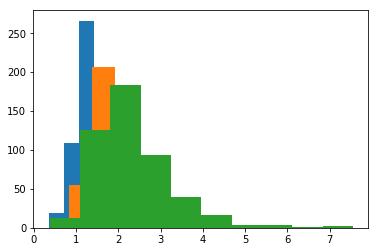

In [15]:
p = train.SalePrice/100000
plt.hist(p[pc_pred=='pc1'])
plt.hist(p[pc_pred=='pc2'])
plt.hist(p[pc_pred=='pc3'])

In [16]:
price_category = pd.DataFrame(np.zeros((all_data.shape[0],1)), columns=['pc'])
X_t = pd.get_dummies(all_data.loc[:, columns_for_pc], sparse=True)
pc_pred = svm.predict(X_t)
price_category[pc_pred=='pc2'] = 1
price_category[pc_pred=='pc3'] = 2
price_category = price_category.to_sparse()

In [17]:
# Monthes with the lagest number of deals may be significant
season = all_data.MoSold.replace( {1: 0, 
                                   2: 0, 
                                   3: 0, 
                                   4: 1,
                                   5: 1, 
                                   6: 1,
                                   7: 1,
                                   8: 0,
                                   9: 0,
                                  10: 0,
                                  11: 0,
                                  12: 0})
season.name = 'season'

# Numer month is not significant
all_data = all_data.replace({'MoSold': {1: 'Yan', 
                                        2: 'Feb', 
                                        3: 'Mar', 
                                        4: 'Apr',
                                        5: 'May', 
                                        6: 'Jun',
                                        7: 'Jul',
                                        8: 'Avg',
                                        9: 'Sep',
                                        10: 'Oct',
                                        11: 'Nov',
                                        12: 'Dec'}})

In [18]:
all_data = all_data.replace({'CentralAir': {'Y': 1, 
                                            'N': 0}})
all_data = all_data.replace({'PavedDrive': {'Y': 1, 
                                            'P': 0,
                                            'N': 0}})

In [19]:

reconstruct = pd.DataFrame(np.zeros((all_data.shape[0],1)), columns=['Reconstruct'])
reconstruct[all_data.YrSold < all_data.YearRemodAdd] = 1
reconstruct = reconstruct.to_sparse()

recon_after_buy = pd.DataFrame(np.zeros((all_data.shape[0],1)), columns=['ReconstructAfterBuy'])
recon_after_buy[all_data.YearRemodAdd >= all_data.YrSold] = 1
recon_after_buy = recon_after_buy.to_sparse()

build_eq_buy = pd.DataFrame(np.zeros((all_data.shape[0],1)), columns=['Build.eq.Buy'])
build_eq_buy[all_data.YearBuilt >= all_data.YrSold] = 1
build_eq_buy = build_eq_buy.to_sparse()


In [20]:

# I hope this will help
all_data.YrSold = 2010 - all_data.YrSold


In [21]:

year_map = pd.concat(pd.Series('YearGroup' + str(i+1), index=range(1871+i*20,1891+i*20)) for i in range(0, 7))
all_data.GarageYrBlt = all_data.GarageYrBlt.map(year_map)
all_data.loc[all_data['GarageYrBlt'].isnull(), 'GarageYrBlt'] = 'NoGarage'


In [22]:

all_data.YearBuilt = all_data.YearBuilt.map(year_map)
all_data.YearRemodAdd = all_data.YearRemodAdd.map(year_map)


In [23]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

t = all_data[numeric_feats].quantile(.95)
#print(t)
use_max_scater = t[t == 0].index
use_95_scater = t[t != 0].index


In [24]:
#print(t)
#print(use_95_scater)
#print(use_max_scater)


In [25]:
# normalize data closer to 0 (divide by max value, so all value are at range [0,1])
all_data[use_max_scater] = all_data[use_max_scater]/all_data[use_max_scater].max()
# normalize data closer to 0 (divide by max value (of 95%), so all value are at range [0,1])
all_data[use_95_scater] = all_data[use_95_scater]/all_data[use_95_scater].quantile(.95)

In [26]:
# option 1 - Author's choice
t = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
     '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
     'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

# option 2 - all numarical fetures
#t = all_data.dtypes[all_data.dtypes != "object"].index
print(t)


['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [27]:
all_data.loc[:, t] = np.log1p(all_data.loc[:, t])

## Preparing for sklearn##

In [28]:
# all classes in sklearn requires numeric data only
# transform categorical variable into binary
X = pd.get_dummies(all_data, sparse=True)
X = X.fillna(0)

In [29]:
X = X.drop('RoofMatl_ClyTile', axis=1) # only one is not zero
X = X.drop('Condition2_PosN', axis=1) # only two is not zero
X = X.drop('MSZoning_C (all)', axis=1)
X = X.drop('MSSubClass_SubClass_160', axis=1)
# this features definitely couse overfitting

In [30]:
# add new features
X = pd.concat((X, newer_dwelling, season, reconstruct, recon_after_buy,
               qu_list, bad_heating, MasVnrType_Any, price_category, build_eq_buy), axis=1)

In [31]:
from itertools import product, chain

def poly(X):
    areas = ['LotArea', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'BsmtUnfSF']
    # t = [s for s in X.axes[1].get_values() if s not in areas]
    t = chain(qu_list.axes[1].get_values(), 
              ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtCond', 'GarageQual', 'GarageCond',
               'KitchenQual', 'HeatingQC', 'bad_heating', 'MasVnrType_Any', 'SaleCondition_PriceDown', 'Reconstruct',
               'ReconstructAfterBuy', 'Build.eq.Buy'])
    for a, t in product(areas, t):
        x = X.loc[:, [a, t]].prod(1)
        x.name = a + '_' + t
        yield x

XP = pd.concat(poly(X), axis=1)
X = pd.concat((X, XP), axis=1)

In [32]:
X_train = X[:train.shape[0]]
X_test = X[train.shape[0]:]
#print(X_test)

In [33]:
# the model has become really big
X_train.shape
#print(X_train)

(1460, 466)

In [34]:
X_test.shape

(1459, 466)

In [35]:
y = np.log1p(train.SalePrice)

In [36]:
y.shape

(1460,)

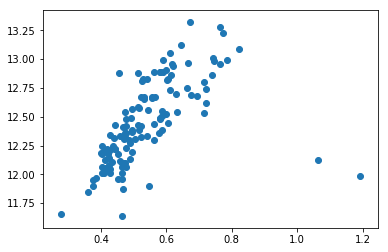

In [37]:

# this come from iterational model improvment. I was trying to understand why the model gives to the two points much better price
x_plot = X_train.loc[X_train['SaleCondition_Partial']==1, 'GrLivArea']
y_plot = y[X_train['SaleCondition_Partial']==1]
plt.scatter(x_plot, y_plot)


In [38]:

outliers_id = np.array([524, 1299])

outliers_id = outliers_id - 1 # id starts with 1, index starts with 0
X_train = X_train.drop(outliers_id)
y = y.drop(outliers_id)
# There are difinetly more outliers


# Prediction Methods #

In [39]:
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

def rmsle(y, y_pred):
     return np.sqrt((( (np.log1p(y_pred*price_scale)- np.log1p(y*price_scale)) )**2).mean())

# scorer = make_scorer(rmsle, False)
scorer = make_scorer(mean_squared_error, False)

def rmse_cv(model, X, y):
     return (cross_val_score(model, X, y, scoring=scorer)).mean()

/home/barlesh/Anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# PCA & Linear Reggression #

## Train ##

In [40]:

#from sklearn import datasets, linear_model

# Create linear regression object
#regr = linear_model.LinearRegression()


In [41]:
#regr.fit(X_train, y)

In [42]:
# The coefficients
#print('Coefficients: \n', regr.coef_)


In [43]:
#print("Mean squared error: %.2f"
#      % np.mean((regr.predict(X_train) - y) ** 2))


In [44]:
# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % regr.score(X_train, y))

## Predict ##

In [45]:
'''pred = abs(regr.predict(X_test))
print (pred)
print(max(pred))
print(min(pred))
'''

'pred = abs(regr.predict(X_test))\nprint (pred)\nprint(max(pred))\nprint(min(pred))\n'

In [46]:
'''

pred = np.expm1(pred) 
#pred = (regr.predict(X_test))
preds =pred
solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv(data_path+result_path+"lreg_results.csv", index = False)
'''

'\n\npred = np.expm1(pred) \n#pred = (regr.predict(X_test))\npreds =pred\nsolution = pd.DataFrame({"id":test.Id, "SalePrice":preds})\nsolution.to_csv(data_path+result_path+"lreg_results.csv", index = False)\n'

# Lasso & Reggression #

## Train ##

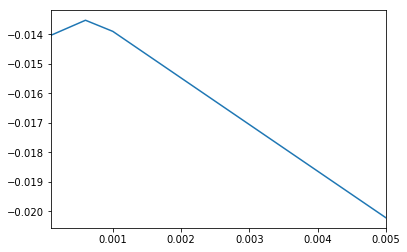

In [47]:
alphas = [1e-4, 6e-4, 1e-3, 5e-3]
cv_lasso = [rmse_cv(Lasso(alpha = alpha, max_iter=150000), X_train, y) for alpha in alphas]
pd.Series(cv_lasso, index = alphas).plot()

Choose alpha with better score

In [48]:
model_lasso = Lasso(alpha=5e-4, max_iter=1150000).fit(X_train, y)

## Predict ##

In [49]:
# This is a good way to see how model predict data
#p_pred = np.expm1(model_lasso.predict(X_test))

In [50]:
#p_pred = abs(regr.predict(X_test))
#print (p_pred)
#print(max(p_pred))
#print(min(p_pred))

In [51]:

#plt.scatter(p_pred, np.expm1(y))
#plt.plot([min(p_pred),max(p_pred)], [min(p_pred),max(p_pred)], c="red")

Some point are far from the red line. May be they are outliers like the 524th and the 1299th

In [52]:
# save to file to make a submission
p = np.expm1(model_lasso.predict(X_test))
solution = pd.DataFrame({"id":test.Id, "SalePrice":p}, columns=['id', 'SalePrice'])
solution.to_csv(data_path+result_path+"lasso_result.csv", index = False)

In [53]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

cv_rmse_lasso = rmse_cv(model_lasso).mean()
print (cv_rmse_lasso)

0.112654281824


# SVM #

## Train ##

In [54]:
#def rmse_cv(model):
#    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
#    return(rmse)

In [55]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import SVR

model_svm = svm.SVR(kernel="rbf", C=1,)
model_svm.fit(X_train, y)

cv_rmse_svm = rmse_cv(model_svm).mean()

In [56]:
print (cv_rmse_svm)

0.11874769489


## Predict ##

In [57]:
svm_preds = np.expm1(model_svm.predict(X_test))
preds =svm_preds
solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv(data_path+result_path+"svm_results.csv", index = False)

### 1.1. 

[back to top](#top)]

<a id='1.2.'></a>

### 1.2. 

[[back to top](#top)]

<a id='2.'></a>

## 2. 

[[back to top](#top)]

<a id='2.'></a>

<a id='2.1.'></a>

### 2.1. 

[[back to top](#top)]

### 2.2. 

[[back to top](#top)]

<a id='Appendix'></a>

## Appendix

[[back to top](#top)]

- Great tutorials: 
 - 1) 
 - 2) 
- Refferences: 
 - 1) 
- Resources: 
 - 
 - 

[[back to top](#top)]